# Using hc/wavelength and relative heights (B)

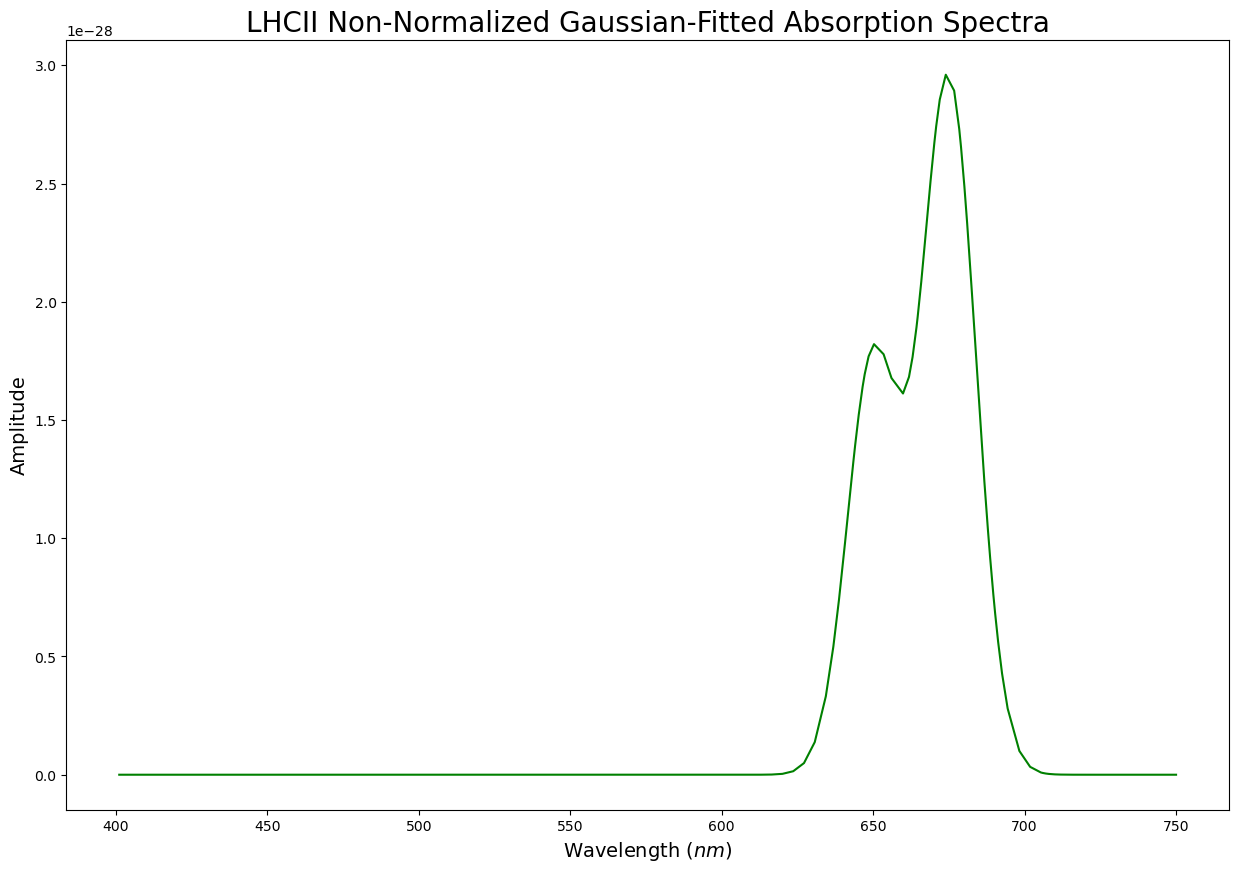

Trapezium Integration: 1.0385660936761903e-26
Value of N: 9.62866018916833e+25


In [7]:

#Non-normalized LHCII

import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math

A1 = 0.43
A2 = 0.75
mu1 = 650
mu2 = 675 
sigma1 = 8.5 
sigma2 = 9 
hc = 1.98644568E-25
B = A1/A2 

res = 1 

spec_X = []  
spec_Y = [] 
counter = 0 

fin = open('Raw_perlamda_LHCII.txt', 'r') 
#fout = open('LHCII_nonnormalized_gaussianspectra.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = ((B*(hc/float(elements[0])))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))) + ((hc/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_X.append(wavelength) 
        spec_Y.append(amplitude) 
        #fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('LHCII Non-Normalized Gaussian-Fitted Absorption Spectra', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_X,spec_Y,linestyle='-',color='g')
#plt.savefig('LHCII_non-normalized_gaussianspectra.txt.pdf') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

#fout.close() 
fin.close() 

#Integral
print('Trapezium Integration:', np.trapz(spec_Y, spec_X))
print('Value of N:', 1/np.trapz(spec_Y, spec_X))

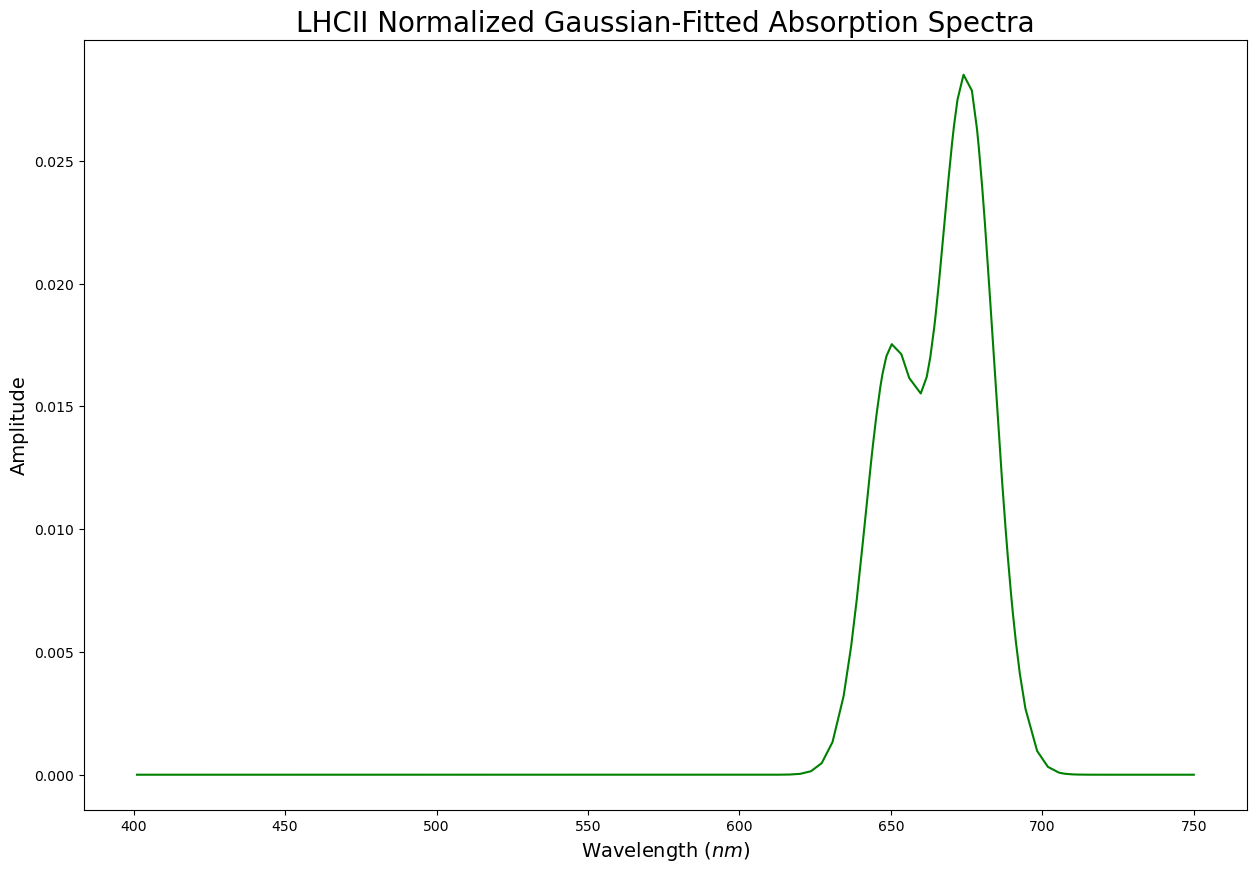

Trapezium Integration: 1.0


In [8]:
#Normalized LHCII

A1 = 0.43
A2 = 0.75
mu1 = 650
mu2 = 675 
sigma1 = 8.5 
sigma2 = 9 
hc = 1.98644568E-25
B = A1/A2 
N = 9.62866018916833e+25 #this is chosen from 1/integral of ABOVE curve so that the integral under the BELOW curve below = 1

res = 1 

spec_X = []  
spec_Y = [] 
counter = 0 

fin = open('Raw_perlamda_LHCII.txt', 'r') 
fout = open('LHCII_normalized_gaussianspectra.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*(((B*(hc/float(elements[0])))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))) + ((hc/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2))))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_X.append(wavelength) 
        spec_Y.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('LHCII Normalized Gaussian-Fitted Absorption Spectra', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_X,spec_Y,linestyle='-',color='g')
plt.savefig('LHCII_normalized_gaussianspectra.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

#Integral
print('Trapezium Integration:', np.trapz(spec_Y, spec_X))

## Separating into g1 and g2 curves

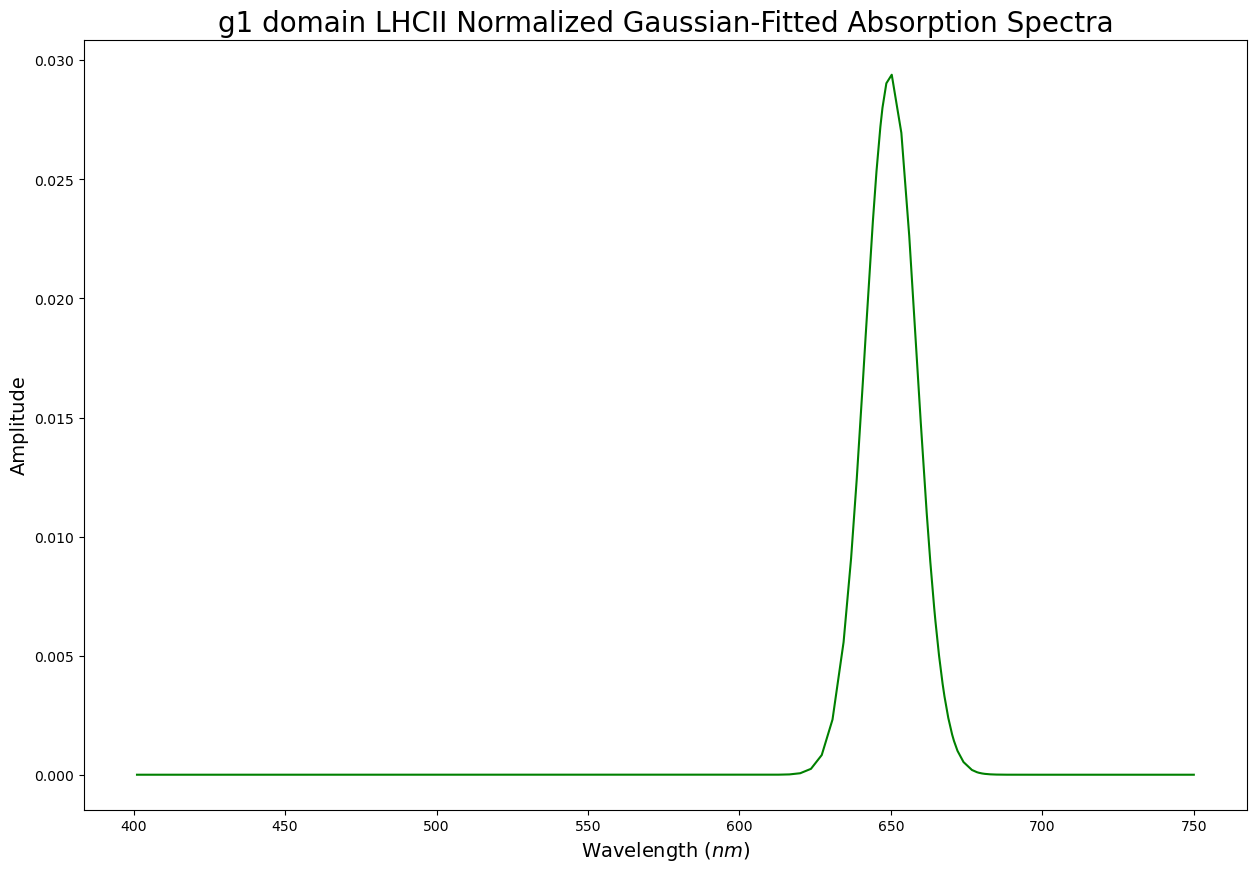

In [9]:
#G1 

A1 = 0.43
A2 = 0.75
mu1 = 650
mu2 = 675 
sigma1 = 8.5 
sigma2 = 9 
hc = 1.98644568E-25
B = A1/A2 
N = 9.62866018916833e+25 

res = 1 

spec_X1 = []  
spec_Y1 = [] 
counter = 0 

fin = open('Raw_perlamda_LHCII.txt', 'r') 
fout = open('g1_domain_LHCII_normalized_gaussianspectra.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*((hc/float(elements[0])))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_X1.append(wavelength) 
        spec_Y1.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('g1 domain LHCII Normalized Gaussian-Fitted Absorption Spectra', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_X1,spec_Y1,linestyle='-',color='g')
plt.savefig('g1_domain_LHCII_normalized_gaussianspectra.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 650: 0.02934188791715559
interped y value at x = 1000: -2.3592876155152297e-17


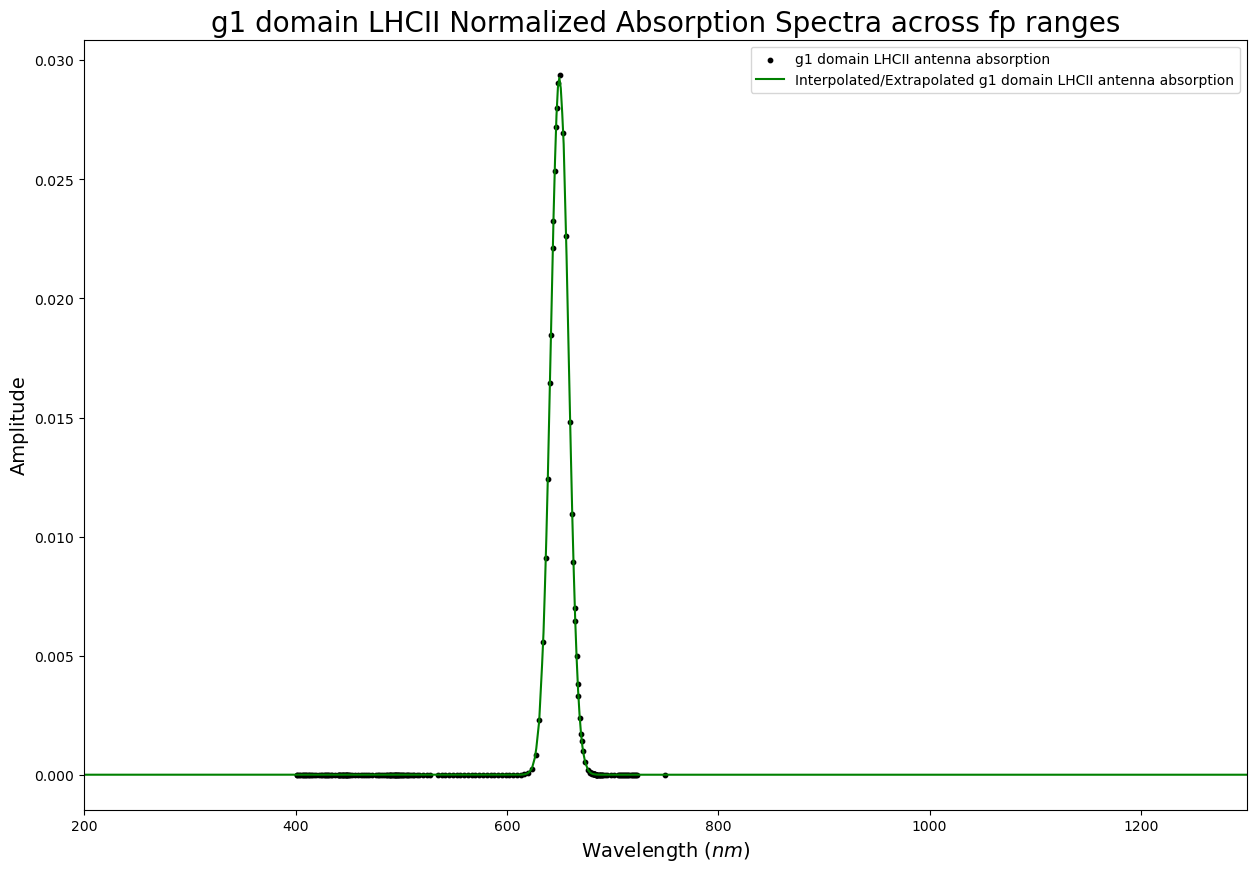

In [10]:
#G1 INTERPOLATED


from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f = interp1d(spec_X1,spec_Y1,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x = [] #create empty array for fp_x
fp_y = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LHCII_out = open('g1_LHCII_spectra_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x.append(wavelength) #add floater wavelengths to fp_x array
    fp_y.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp = fp_x #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp = abs(y_f(x_interp)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp): #for each x value in the 200-1200nm range
    LHCII_out.write(str(line)+'\t'+str(abs(y_interp[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LHCII_out.close()

print('interped y value at x = 650:', y_f(650))
print('interped y value at x = 1000:', y_f(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('g1 domain LHCII Normalized Absorption Spectra across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_X1,spec_Y1,color='k',label='g1 domain LHCII antenna absorption',s=10) #plot scattter of current LHCII absorption curve (SMALL RANGE)
ax.plot(x_interp,y_interp,color='g',label='Interpolated/Extrapolated g1 domain LHCII antenna absorption') #plot interped/extraped x and y for LHCII absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.3e+03)

plt.legend()

plt.savefig('g1_domain_LHCII_spectra_interp.png') 
plt.show() 

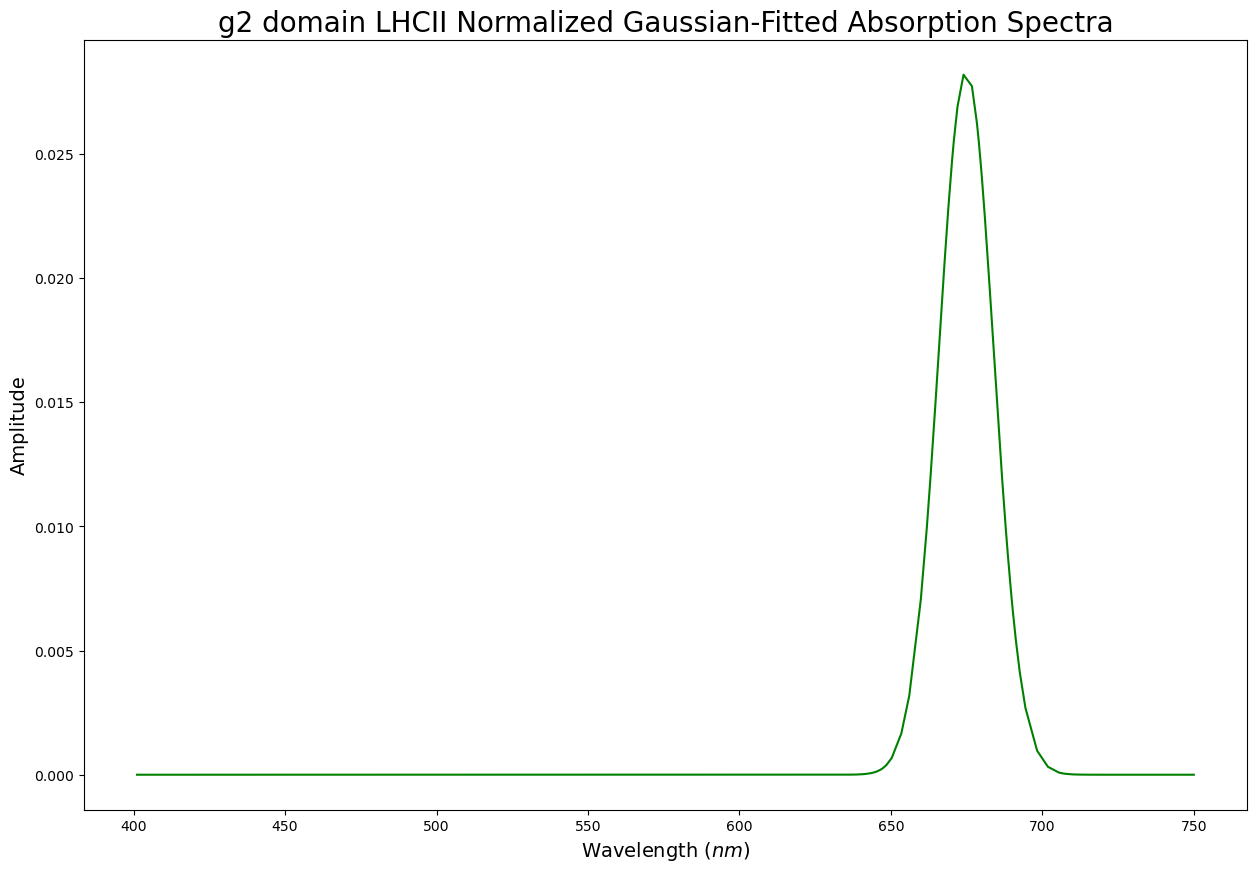

In [11]:
#G2

A1 = 0.43
A2 = 0.75
mu1 = 650
mu2 = 675 
sigma1 = 8.5 
sigma2 = 9 
hc = 1.98644568E-25
B = A1/A2 
N = 9.62866018916833e+25 #this is chosen from 1/integral of ABOVE curve so that the integral under the BELOW curve below = 1

res = 1 

spec_X2 = []  
spec_Y2 = [] 
counter = 0 

fin = open('Raw_perlamda_LHCII.txt', 'r') 
fout = open('g2_domain_LHCII_normalized_gaussianspectra.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*((hc/float(elements[0])))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_X2.append(wavelength) 
        spec_Y2.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('g2 domain LHCII Normalized Gaussian-Fitted Absorption Spectra', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_X2,spec_Y2,linestyle='-',color='g')
plt.savefig('g2_domain_LHCII_normalized_gaussianspectra.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 650: 0.0006308456299553063
interped y value at x = 1000: -1.6309771205967105e-07


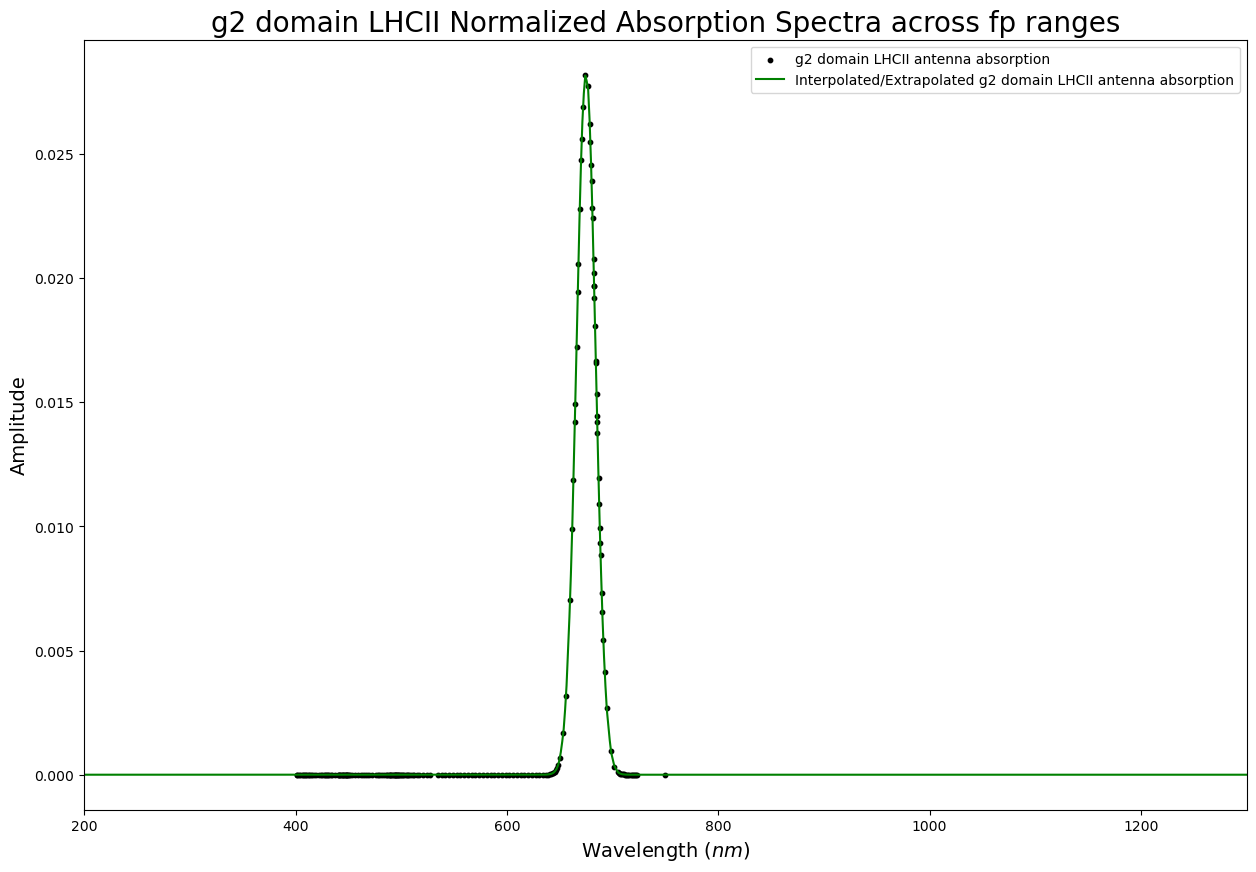

In [12]:
#G2 INTERPOLATED

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f = interp1d(spec_X2,spec_Y2,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x = [] #create empty array for fp_x
fp_y = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LHCII_out = open('g2_LHCII_spectra_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x.append(wavelength) #add floater wavelengths to fp_x array
    fp_y.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp = fp_x #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp = abs(y_f(x_interp)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp): #for each x value in the 200-1200nm range
    LHCII_out.write(str(line)+'\t'+str(abs(y_interp[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LHCII_out.close()

print('interped y value at x = 650:', y_f(650))
print('interped y value at x = 1000:', y_f(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('g2 domain LHCII Normalized Absorption Spectra across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_X2,spec_Y2,color='k',label='g2 domain LHCII antenna absorption',s=10) #plot scattter of current LHCII absorption curve (SMALL RANGE)
ax.plot(x_interp,y_interp,color='g',label='Interpolated/Extrapolated g2 domain LHCII antenna absorption') #plot interped/extraped x and y for LHCII absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.3e+03)

plt.legend()

plt.savefig('g2_domain_LHCII_spectra_interp.png') 
plt.show() 